# Dependencias

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos

In [55]:
data = np.load("proyecto_training_data.npy")
columns = ["SalePrice","OverallQuality","1stFlrSquareFeet","TotalRoomsAboveGrade","YearBuilt","LotFrontage"]
df = pd.DataFrame(data,columns=columns)
print(f"cantidad de registros {data.shape}")

cantidad de registros (1460, 6)


# Slicing

In [24]:
training_items = data.shape[0] * 80//100
testing_items = data.shape[0] - training_items 
print(f"cantidad de items para entrenamiento {training_items}, cantidad de items para pruebas {testing_items}")

training_set = data[:training_items]
testing_set = data[training_items:]

cantidad de items para entrenamiento 1168, cantidad de items para pruebas 292


# Exploratorio

## Media

In [27]:
mean = df.mean()
print(mean)

SalePrice       180921.195890
OverallQual          6.099315
1stFlrSF          1162.626712
TotRmsAbvGrd         6.517808
YearBuilt         1971.267808
LotFrontage         70.049958
dtype: float64


## Maximo

In [29]:
max = df.max()
print(mean)

SalePrice       755000.0
OverallQual         10.0
1stFlrSF          4692.0
TotRmsAbvGrd        14.0
YearBuilt         2010.0
LotFrontage        313.0
dtype: float64


## Minimo

In [31]:
min = df.min()
print(min)

SalePrice       34900.0
OverallQual         1.0
1stFlrSF          334.0
TotRmsAbvGrd        2.0
YearBuilt        1872.0
LotFrontage        21.0
dtype: float64


## peak

In [32]:
peak = df.max() - df.min()
print(peak)

SalePrice       720100.0
OverallQual          9.0
1stFlrSF          4358.0
TotRmsAbvGrd        12.0
YearBuilt          138.0
LotFrontage        292.0
dtype: float64


## Desviacion estandar

In [33]:
std = df.std()
print(std)

SalePrice       79442.502883
OverallQual         1.382997
1stFlrSF          386.587738
TotRmsAbvGrd        1.625393
YearBuilt          30.202904
LotFrontage        24.284752
dtype: float64


# Histograma

<Figure size 5000x2000 with 0 Axes>

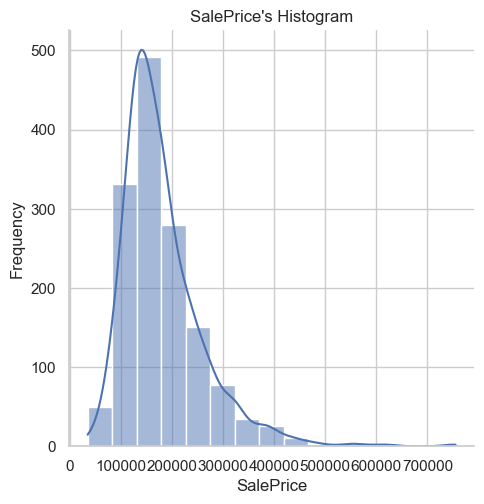

<Figure size 5000x2000 with 0 Axes>

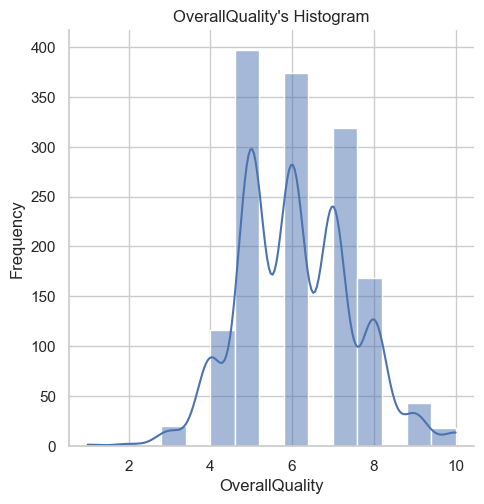

<Figure size 5000x2000 with 0 Axes>

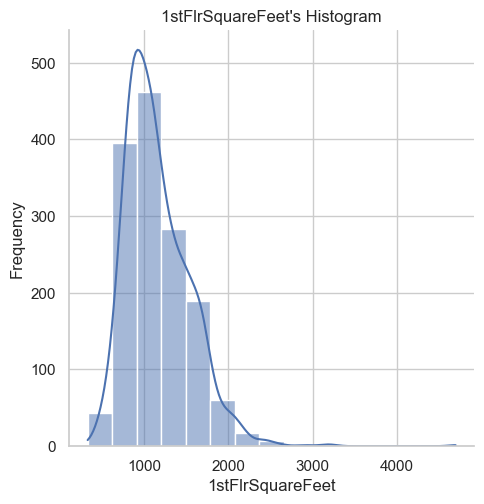

<Figure size 5000x2000 with 0 Axes>

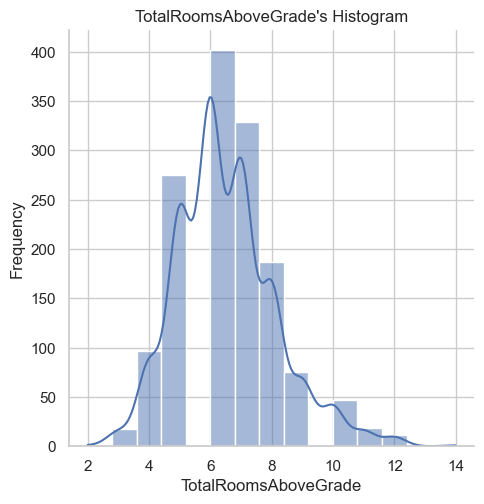

<Figure size 5000x2000 with 0 Axes>

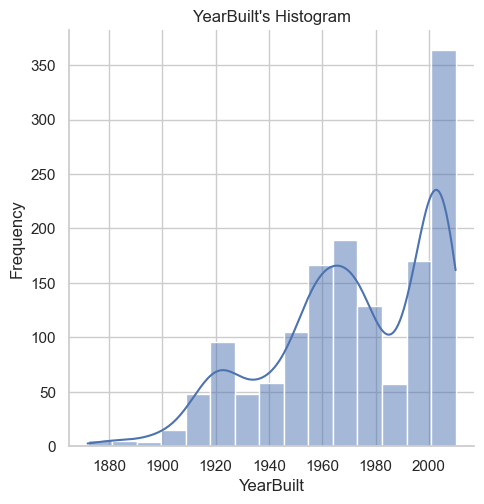

<Figure size 5000x2000 with 0 Axes>

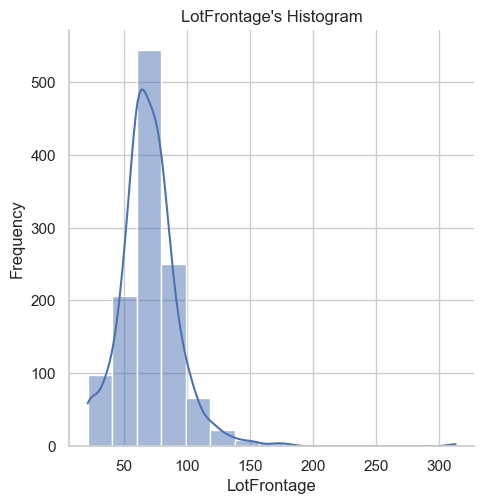

In [56]:
def histogram_show(column):
    plt.figure(figsize=(50, 20)) 
    sns.displot(df[column], bins=15, kde=True) 
    plt.title(f"{column}'s Histogram")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

for columna in df.columns:
    histogram_show(columna)